# Работу выполнил ***Ислам Закиров*** БИВТ-22-16

## ***Пример №1***

In [1]:
import numpy as np
etalons = np.array([
    [-1, -1, 1, -1, 1],
    [1, -1, 1, -1, 1],
    [-1, 1, -1, 1, -1],
    [1, 1, 1, -1, -1]
])

objects = np.array([
    [-1, -1, -1, -1, 1],
    [1, -1, 1, -1, -1],
    [-1, 1, -1, -1, -1],
    [-1, 1, -1, -1, -1]
])

size = etalons.shape[1]

In [2]:
# etalons - это 2D массив, где каждая строка - это отдельный паттерн

weights = np.dot(etalons.T, etalons)
np.fill_diagonal(weights, 0)

weights

array([[ 0,  0,  2, -2,  0],
       [ 0,  0, -2,  2, -4],
       [ 2, -2,  0, -4,  2],
       [-2,  2, -4,  0, -2],
       [ 0, -4,  2, -2,  0]])

In [3]:
import numpy as np

max_iterations = 10

noisy_patterns_array = np.array(objects)  # Массив шумовых паттернов
weights_array = np.array(weights)  # Массив весов

# Инициализирую массив для хранения результатов
results = np.copy(noisy_patterns_array)

# выполняю итерации
for iteration in range(max_iterations):
    new_patterns = np.sign(np.dot(results, weights_array))
    # роверяю, изменились ли паттерны
    unchanged = np.all(new_patterns == results, axis=1)
    
    # Обновляю результаты, если паттерны изменились
    results[~unchanged] = new_patterns[~unchanged]
    if np.all(unchanged):
        break

for i in range(len(noisy_patterns_array)):
    print('{:<25} {:<10} {:<10}'.format("Зашумлённый объект", i, str(tuple(objects[i]))))
    print('{:<25} {:<10} {:<10}'.format("Результат востановления", i, str(tuple(results[i]))))
    print("")

Зашумлённый объект        0          (-1, -1, -1, -1, 1)
Результат востановления   0          (1, -1, 1, -1, 1)

Зашумлённый объект        1          (1, -1, 1, -1, -1)
Результат востановления   1          (1, -1, 1, -1, 1)

Зашумлённый объект        2          (-1, 1, -1, -1, -1)
Результат востановления   2          (-1, 1, -1, 1, -1)

Зашумлённый объект        3          (-1, 1, -1, -1, -1)
Результат востановления   3          (-1, 1, -1, 1, -1)



## ***Пример №2***

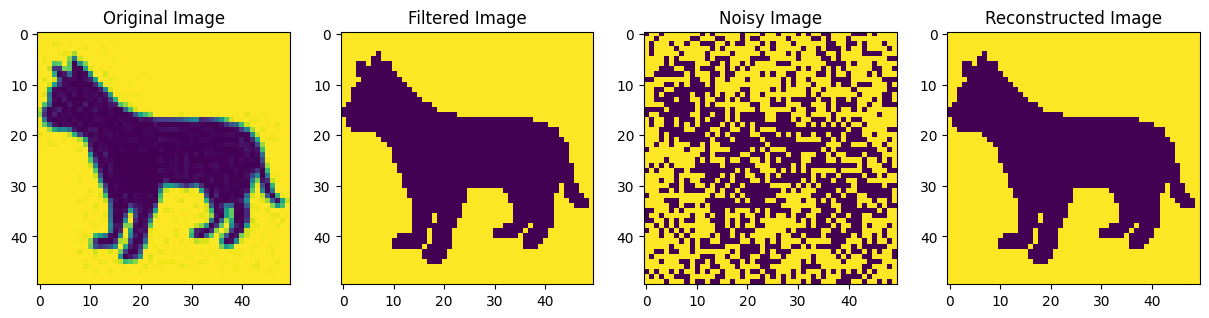

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

def trainer(data_vector):
    flat_vector = data_vector.flatten()
    coefficients = np.zeros((len(flat_vector), len(flat_vector)))

    # получаю индексы строк и столбцов для матрицы коэффициентов
    row_indices, col_indices = np.indices((len(flat_vector), len(flat_vector)))
    
    # определяю действительные индексы, исключая диагональные элементы
    valid_indices = row_indices != (row_indices - col_indices)
    coefficients[valid_indices] = flat_vector[row_indices[valid_indices]] * flat_vector[col_indices[valid_indices]]
    # преобразую вектор обратно в двумерный массив
    reshaped_vector = np.reshape(flat_vector, (int(np.sqrt(len(flat_vector))), int(np.sqrt(len(flat_vector)))))

    return coefficients

def prediction(damaged_vector, coefficients):
    flat_damaged = damaged_vector.flatten()
    intermediate_result = np.dot(coefficients, flat_damaged)
    
    # применяю порог для получения выходного вектора
    output_vector = np.where(intermediate_result > 0, 1, -1)
    reshaped_output = np.reshape(output_vector, (int(np.sqrt(len(output_vector))), int(np.sqrt(len(output_vector)))))
    return reshaped_output

def image_generator(input_image, threshold=1):
    filtered_image = np.zeros((len(input_image), len(input_image)))
    filtered_image = np.where(input_image >= threshold, 1, -1)
    # добавляю шум к отфильтрованному изображению
    noisy_image = filtered_image + np.random.normal(0, 2, input_image.shape)

    noisy_image = np.where(noisy_image >= 0, 1, -1)
    return filtered_image, noisy_image

original_image = img.imread('1.jpg').copy()
clean_vector, noisy_vector = image_generator(original_image, 230)

coef_matrix = trainer(clean_vector)

reconstructed_vector = prediction(noisy_vector, coef_matrix)

plt.figure(figsize=(15, 10))
plt.subplot(1, 4, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.subplot(1, 4, 2)
plt.imshow(clean_vector)
plt.title('Filtered Image') 
plt.subplot(1, 4, 3)
plt.imshow(noisy_vector)
plt.title('Noisy Image') 
plt.subplot(1, 4, 4)
plt.imshow(reconstructed_vector)
plt.title('Reconstructed Image')
plt.show() 

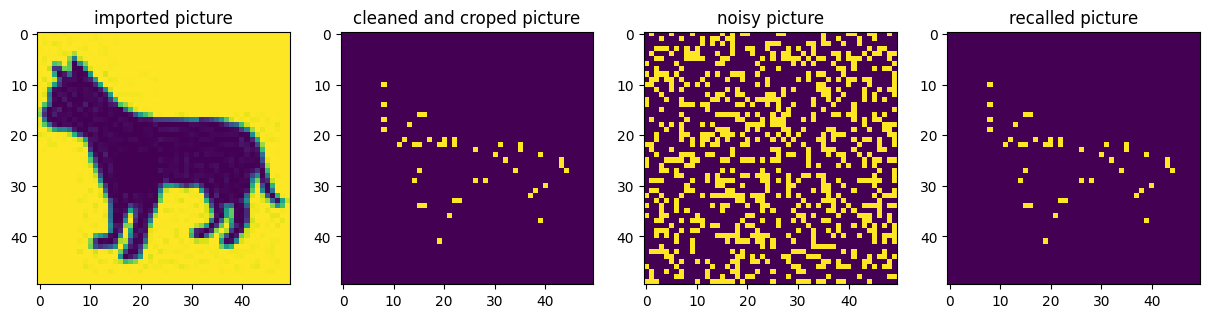

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as sp
import matplotlib.image as img

def trainer(vector):
    vector = vector.flatten()
    coefMat = np.zeros([len(vector),len(vector)])

    for i in range(len(vector)):
        for j in range(len(vector)):
            if (i!=(i-j)):
                coefMat[i][i-j] = vector[i]*vector[i-j]

    vector = np.reshape(vector, [int(np.sqrt(len(vector))),int(np.sqrt(len(vector)))])

    return coefMat

def prediction(curuptedVec,coefMat):
    curuptedVec = curuptedVec.flatten()
    predictVec = np.zeros(len(curuptedVec))
    for i in range(len(curuptedVec)):
        temp = 0
        for j in range(len(curuptedVec)):
             temp += coefMat[i][j] * curuptedVec[j]
        if (temp>0):
            predictVec[i] = 1
        if (temp<0):
            predictVec[i] = -1

    predictVec = np.reshape(predictVec, [int(np.sqrt(len(predictVec))),int(np.sqrt(len(predictVec)))])
    return predictVec

def imageGenerator(imageVector, vmax = 1):
    cleanImage = np.zeros([len(imageVector),len(imageVector)])
    for i in range(len(imageVector)):
        for j in range(len(imageVector)):
            if (imageVector[i][j] == vmax):
                cleanImage[i][j] = 1
            else:
                cleanImage[i][j] = -1
    noisyImage = cleanImage + np.random.normal(0, 2, [len(image),len(image)])

    for i in range(len(image)):
        for j in range(len(image)):
            if (noisyImage[i][j] >= 0):
                noisyImage[i][j] = 1
            else:
                noisyImage[i][j] = -1


    return cleanImage,noisyImage
#Import the image
image = img.imread('1.jpg','w').copy()
vector,noisyVec = imageGenerator(image)
coefMatrix1 = trainer(vector)
predictedVec = prediction(noisyVec,coefMatrix)

plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.imshow(image)
plt.title('imported picture')
plt.subplot(1,4,2)
plt.imshow(vector);
plt.title('cleaned and croped picture')
plt.subplot(1,4,3)
plt.imshow(noisyVec);
plt.title('noisy picture')
plt.subplot(1,4,4)
plt.imshow(predictedVec);
plt.title('recalled picture')
plt.show()

In [16]:
are_equal = np.array_equal(reconstructed_vector, predictedVec)
if are_equal:
    print("совпадают.")
else:
    print("различаются.")
    diff = np.where(reconstructed_vector != predictedVec)
    
    print("Индексы различий:", diff)
    print("reconstructed_vector:", reconstructed_vector[diff])
    print("predictedVec:", predictedVec[diff])

различаются.
Индексы различий: (array([ 0,  0,  0, ..., 49, 49, 49], dtype=int64), array([ 0,  1,  2, ..., 47, 48, 49], dtype=int64))
reconstructed_vector: [1 1 1 ... 1 1 1]
predictedVec: [-1. -1. -1. ... -1. -1. -1.]
